# Przetwarzanie sygnałów i obrazów: Sprawozdanie 003

### Temat: Dyskretne przekształcenie Fouriera.
### Imię i nazwisko studenta: Paweł Niewiarowski, Szymon Łupiński
### Data realizacji ćwiczenia: 02.11.2022

In [1]:
from matplotlib import pyplot
import numpy as np

In [2]:
class Stem:
    def __init__(self, x_values, y_values, title,
                 x_label, y_label, ax, y_lim=None):
        self.x_values = x_values
        self.y_values = y_values
        self.title = title
        self.x_label = x_label
        self.y_label = y_label
        self.ax = ax
        self.y_lim = y_lim

    def draw(self):
        self.ax.stem(self.x_values, self.y_values, linefmt='red', markerfmt='x')
        self.ax.set_title(self.title)
        self.ax.set_xlabel(self.x_label)
        self.ax.set_ylabel(self.y_label)
        self.ax.grid()
        if self.y_lim:
            self.ax.set_ylim(self.y_lim[0], self.y_lim[1])

## Zadanie 3.1
Wygeneruj dokładnie 1 okres fali sinusoidalnej (32 lub 64 próbki). Sporządź wykresy sinusoidy i jej transformaty Fouriera (funkcja fft) w jednym oknie (część rzeczywistą - real, urojoną - imag, moduł - absolute i kąt - angle).
Co możesz powiedzieć o symetrii widma zespolonego?

    Odpowiedź: Symetria środka widma zespolonego jest odwrócona.

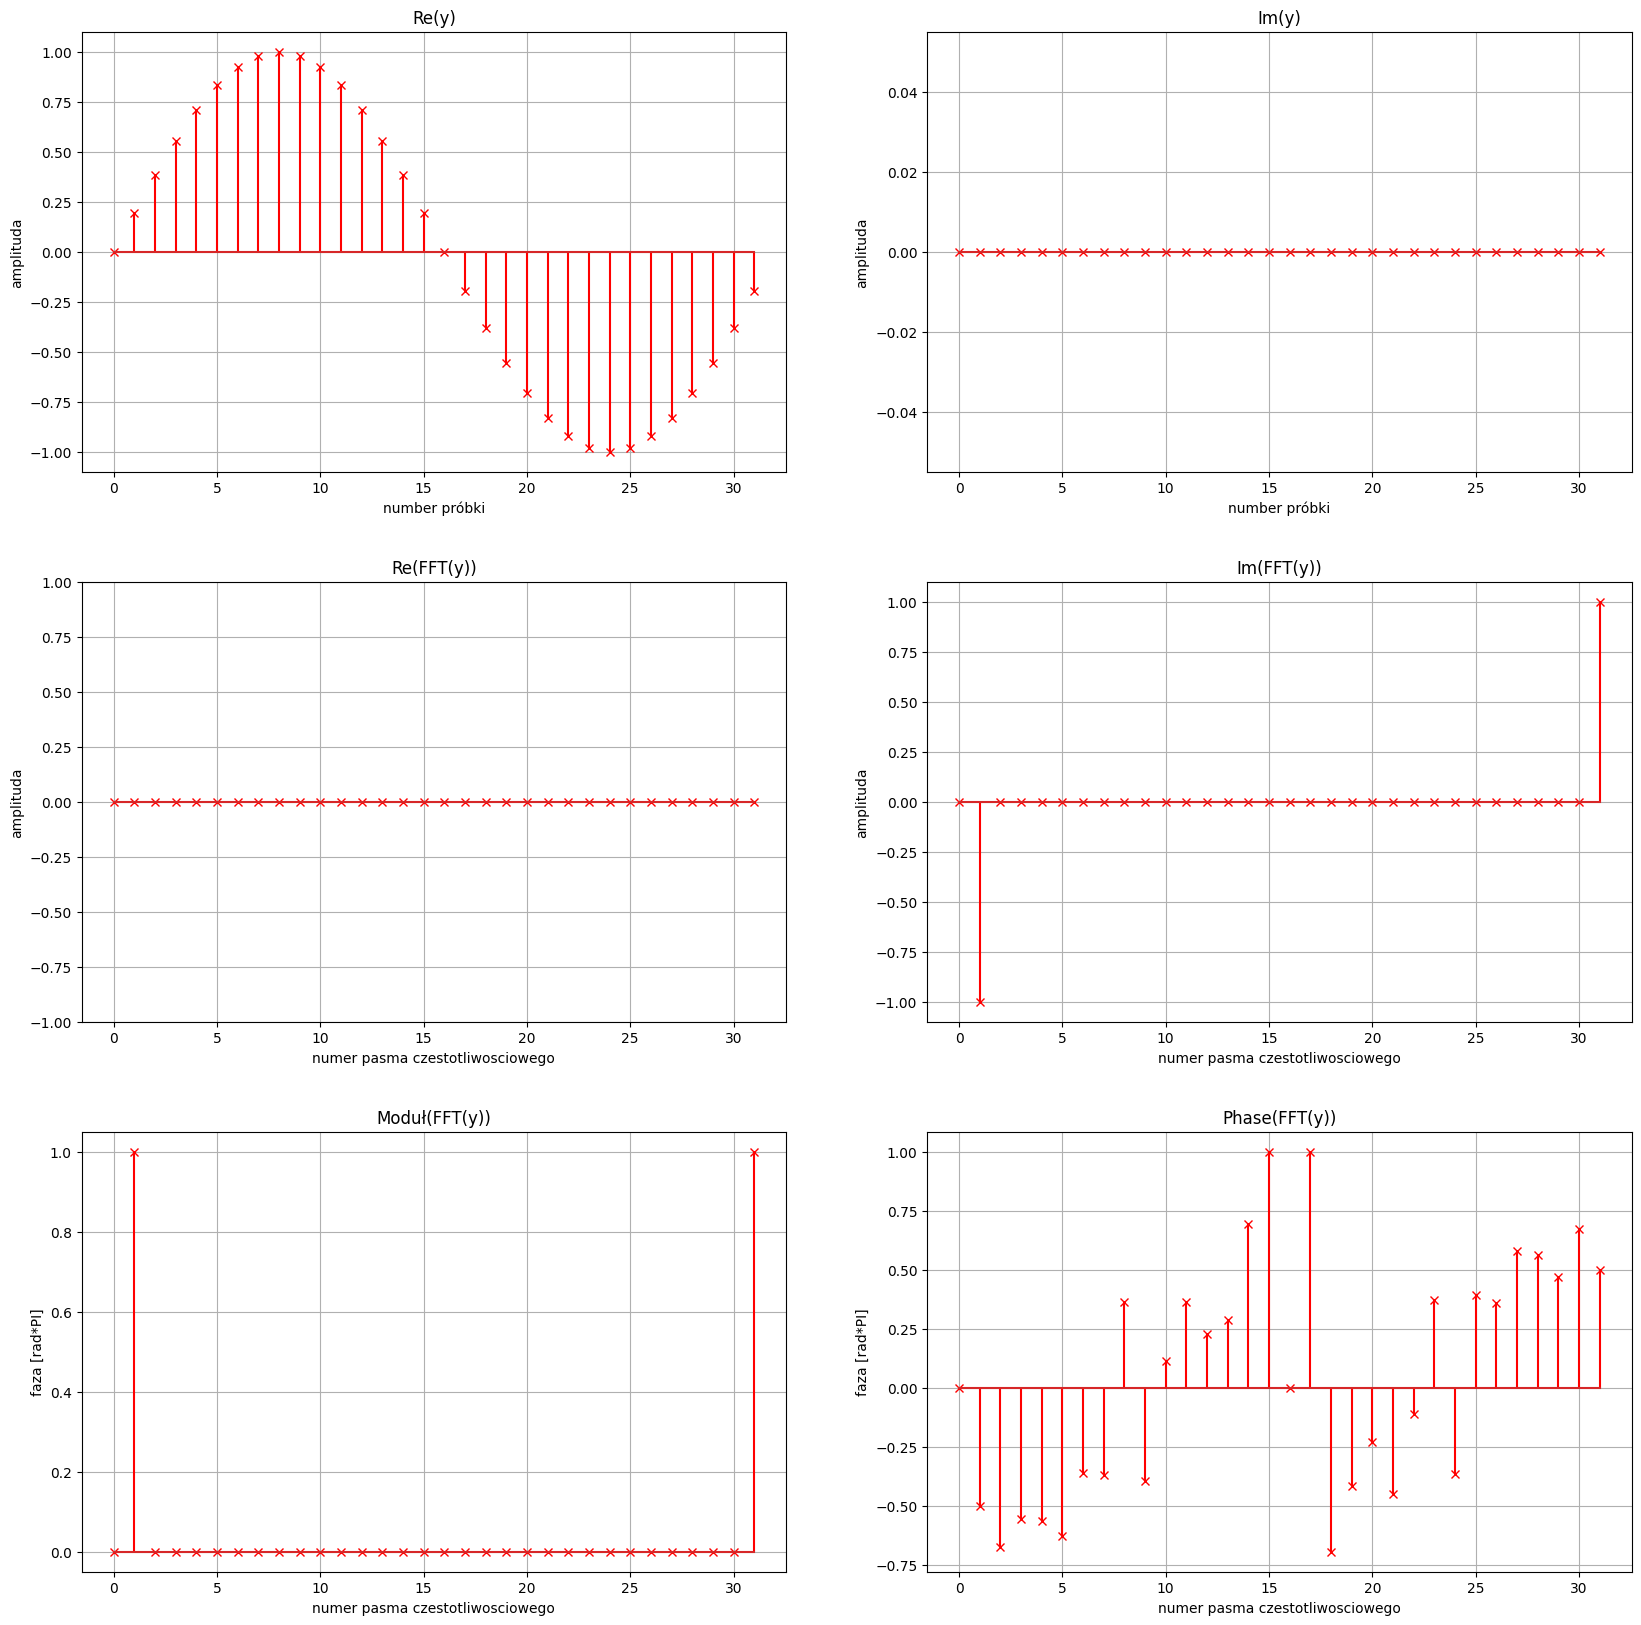

In [3]:
N: int = 32

x_values: np.ndarray = np.arange(0, N)
y_values: np.ndarray = np.sin(2 * np.pi * x_values / N)
y_values_fourier: np.ndarray = 2 * np.fft.fft(y_values) / N

fig, axs = pyplot.subplots(3, 2)
fig.set_size_inches(20, 20)

for stem in [
    Stem(x_values, y_values, 'Re(y)', 'number próbki', 'amplituda', axs[0][0]),
    Stem(x_values, np.imag(y_values), 'Im(y)', 'number próbki', 'amplituda', axs[0][1]),
    Stem(x_values, np.real(y_values_fourier), 'Re(FFT(y))', 'numer pasma czestotliwosciowego', 'amplituda', axs[1][0],
         (-1, 1)),
    Stem(x_values, np.imag(y_values_fourier), 'Im(FFT(y))', 'numer pasma czestotliwosciowego', 'amplituda', axs[1][1]),
    Stem(x_values, np.abs(y_values_fourier), 'Moduł(FFT(y))', 'numer pasma czestotliwosciowego', 'faza [rad*PI]',
         axs[2][0]),
    Stem(x_values, np.angle(y_values_fourier) / np.pi, 'Phase(FFT(y))', 'numer pasma czestotliwosciowego',
         'faza [rad*PI]', axs[2][1]),
]:
    stem.draw()

pyplot.subplots_adjust(hspace=0.25)
pyplot.show()


## Zadanie 3.2

Wygeneruj następujące sygnały: y1[n] = cos(2πn/N+π/4), y2[n] = 0.5cos(4πn/N) oraz by3[n] = 0.25cos(8πn/N+π/2), gdzie N - liczba próbek sygnału.
Wyznacz ich transformaty Fouriera. Obliczenia powtórz dla sygnału y4 = y1 + y2 + y3.

Jaki jest związek pomiędzy amplitudą, fazą, liczbą okresów poszczególnych sygnałów a wartościami widma
zespolonego?

    Odpowiedź: Związek pomiędzy podanymi wartościami a wartościami po przekształceniu fouriera jest homogeniczny.

Jak zachowuje się funkcja fft w stosunku do sumy sygnałów?

    Odpowiedź: Jest ona równa sumie transformat tych sygnałów.

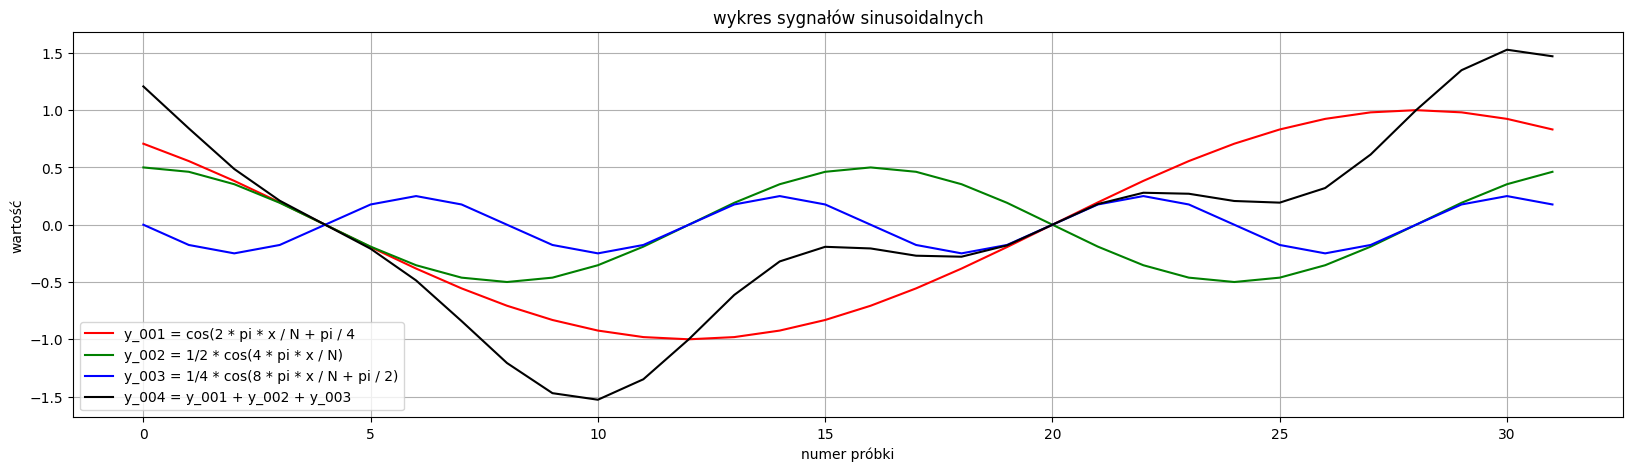

In [4]:
N: int = 32

x_values: np.ndarray = np.arange(0, N, 1)
ys_values = [
    np.cos(2 * np.pi * x_values / N + np.pi / 4),
    1 / 2 * np.cos(4 * np.pi * x_values / N),
    1 / 4 * np.cos(8 * np.pi * x_values / N + np.pi / 2)
]

ys_values.append(ys_values[0] + ys_values[1] + ys_values[2])

fig, ax = pyplot.subplots()
fig.set_size_inches(20, 5)

ax.set_title('wykres sygnałów sinusoidalnych')
ax.set_xlabel('numer próbki')
ax.set_ylabel('wartość')
ax.grid()

ax.plot(
    x_values,
    ys_values[0],
    color='red',
    label='y_001 = cos(2 * pi * x / N + pi / 4'
)

ax.plot(
    x_values,
    ys_values[1],
    color='green',
    label='y_002 = 1/2 * cos(4 * pi * x / N)'
)

ax.plot(
    x_values,
    ys_values[2],
    color='blue',
    label='y_003 = 1/4 * cos(8 * pi * x / N + pi / 2)'
)

ax.plot(
    x_values,
    ys_values[3],
    color='black',
    label='y_004 = y_001 + y_002 + y_003'
)

pyplot.legend()
pyplot.show()

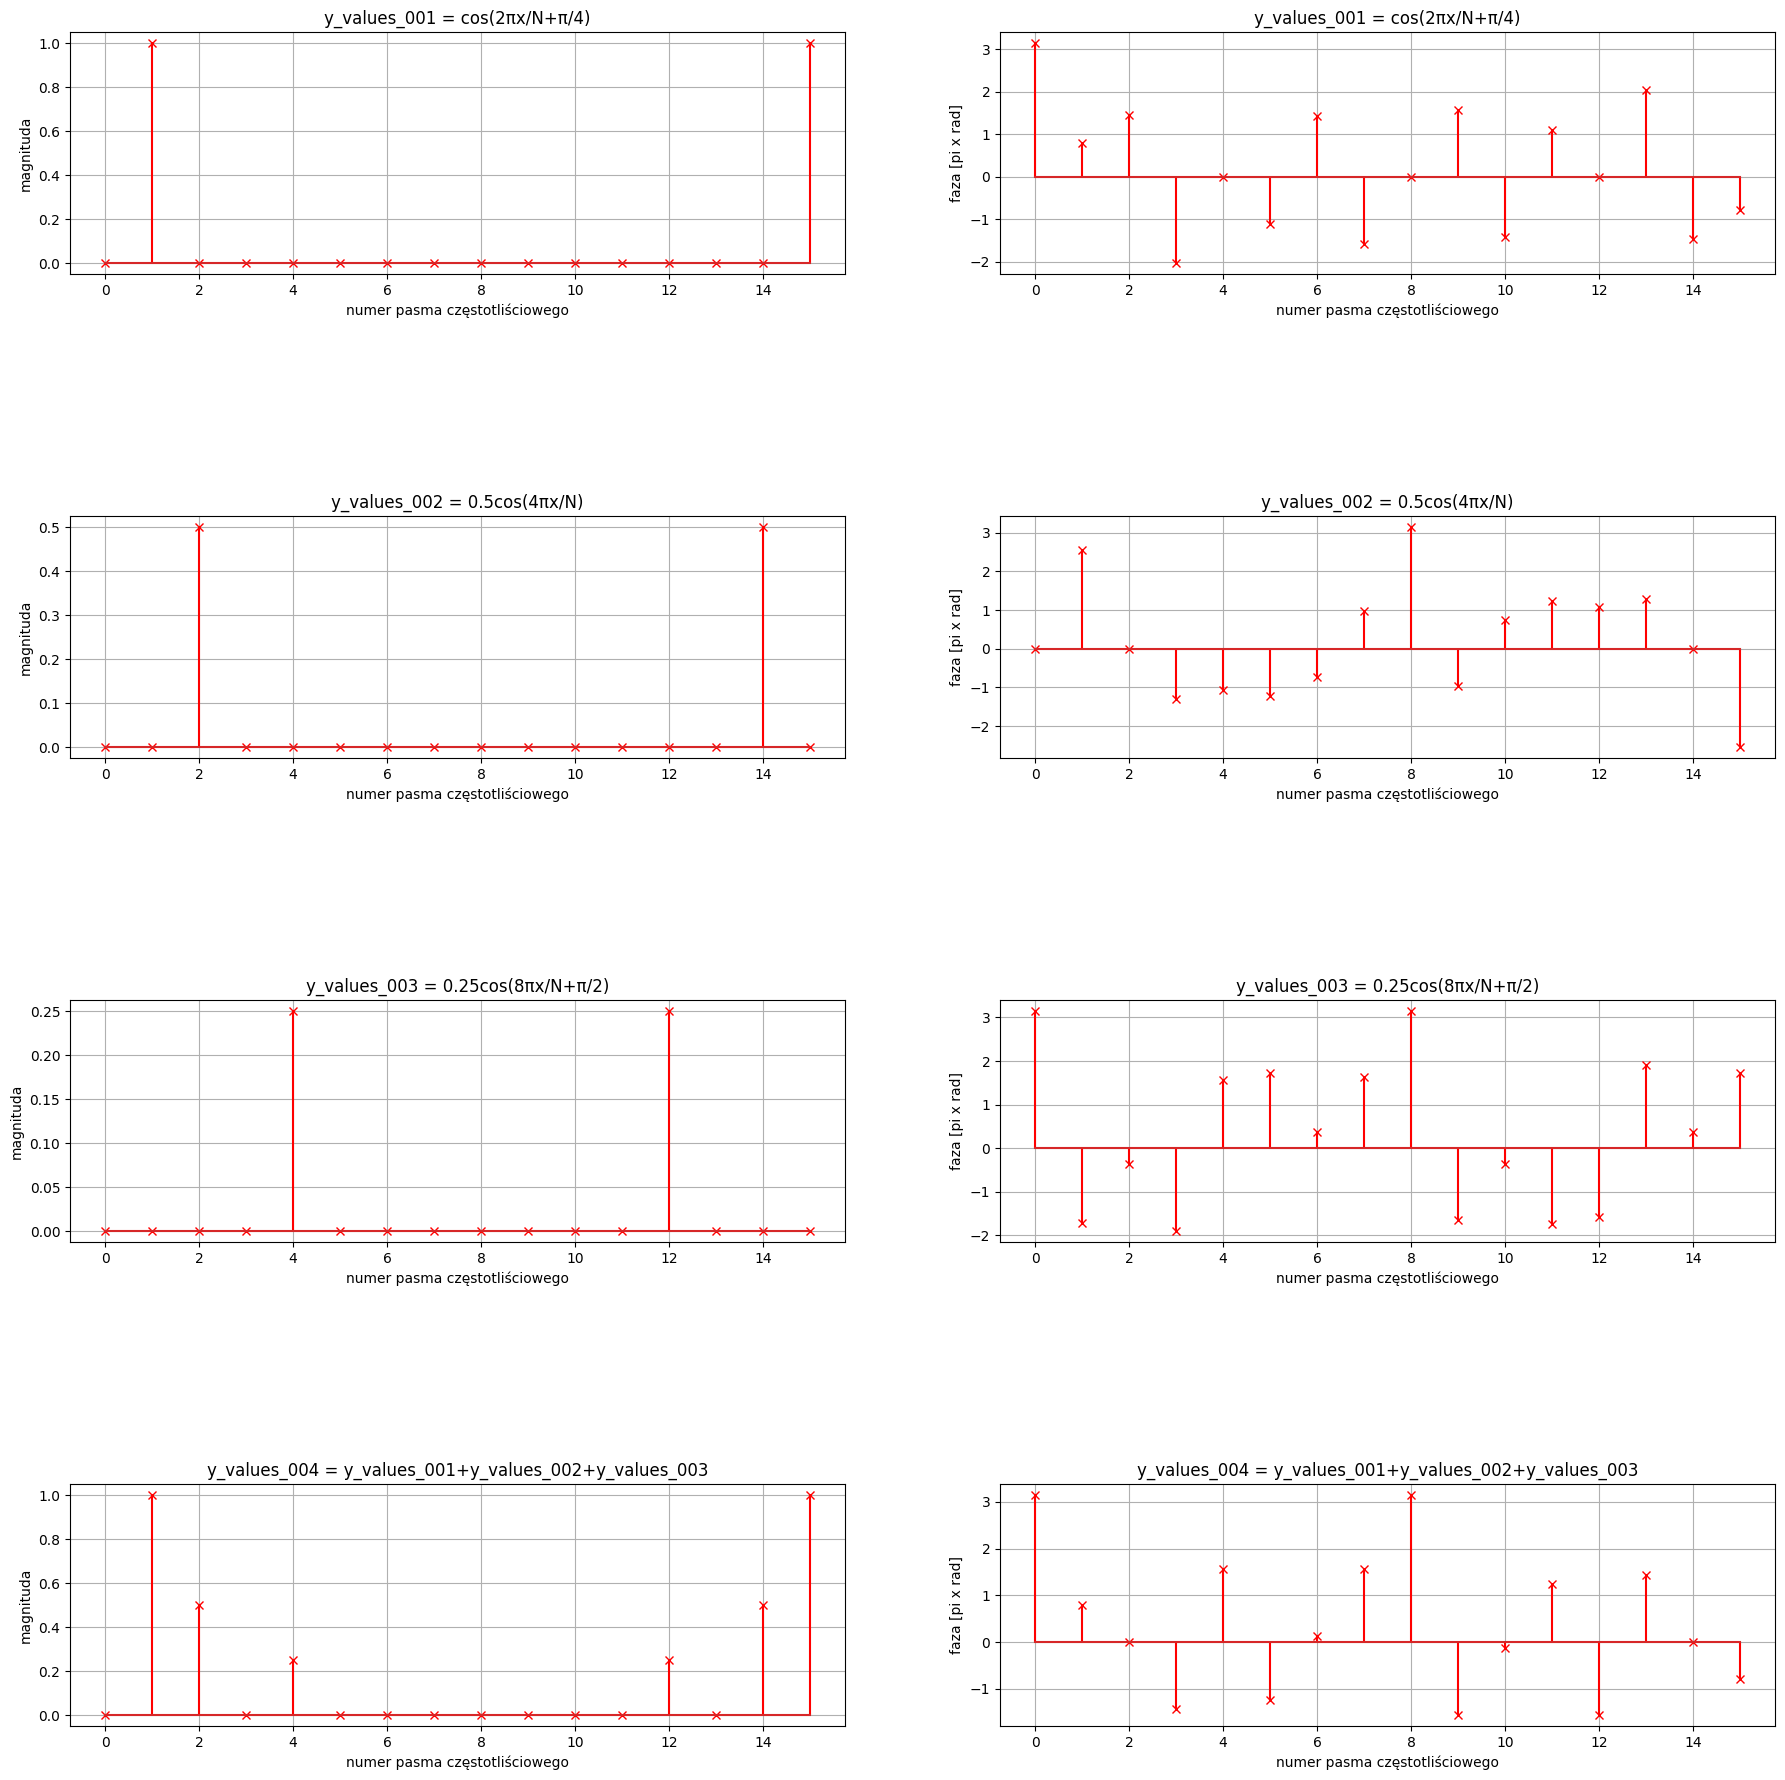

In [5]:
N = 16

x_values = np.arange(0, N, 1)

ys_values = [
    np.cos(2 * np.pi * x_values / N + np.pi / 4),
    1 / 2 * np.cos(4 * np.pi * x_values / N),
    1 / 4 * np.cos(8 * np.pi * x_values / N + np.pi / 2),
    np.cos(2 * np.pi * x_values / N + np.pi / 4) +
    1 / 2 * np.cos(4 * np.pi * x_values / N) +
    1 / 4 * np.cos(8 * np.pi * x_values / N + np.pi / 2),
]

ys_values_fft = [np.fft.fft(y_values) * 2 / N for y_values in ys_values]
ys_values_abs = [np.absolute(y_values_fft) for y_values_fft in ys_values_fft]
ys_values_angle = [np.angle(y_values_fft) for y_values_fft in ys_values_fft]

_, axs = pyplot.subplots(4, 2, figsize=(22, 22))

for stem in [
    Stem(x_values, ys_values_abs[0], 'y_values_001 = cos(2πx/N+π/4)', 'numer pasma częstotliściowego', 'magnituda',
         axs[0][0]),
    Stem(x_values, ys_values_angle[0], 'y_values_001 = cos(2πx/N+π/4)', 'numer pasma częstotliściowego',
         'faza [pi x rad]',
         axs[0][1]),
    Stem(x_values, ys_values_abs[1], 'y_values_002 = 0.5cos(4πx/N)', 'numer pasma częstotliściowego', 'magnituda',
         axs[1][0]),
    Stem(x_values, ys_values_angle[1], 'y_values_002 = 0.5cos(4πx/N)', 'numer pasma częstotliściowego',
         'faza [pi x rad]',
         axs[1][1]),
    Stem(x_values, ys_values_abs[2], 'y_values_003 = 0.25cos(8πx/N+π/2)', 'numer pasma częstotliściowego', 'magnituda',
         axs[2][0]),
    Stem(x_values, ys_values_angle[2], 'y_values_003 = 0.25cos(8πx/N+π/2)', 'numer pasma częstotliściowego',
         'faza [pi x rad]',
         axs[2][1]),
    Stem(x_values, ys_values_abs[3], 'y_values_004 = y_values_001+y_values_002+y_values_003',
         'numer pasma częstotliściowego', 'magnituda',
         axs[3][0]),
    Stem(x_values, ys_values_angle[3], 'y_values_004 = y_values_001+y_values_002+y_values_003',
         'numer pasma częstotliściowego', 'faza [pi x rad]',
         axs[3][1]),
]:
    stem.draw()

pyplot.subplots_adjust(hspace=1)
pyplot.show()


## Zadanie 3.3
Wyznacz odwrotną transformatę Fouriera (funkcja ifft) dla widm zespolonych FFT otrzymanych w zadaniach 3.1 i 3.2.
Jak zinterpretujesz otrzymane wyniki?

    Odpowiedź: Odwrotna tranformata pozwala na otrzymanie sygnały podobnego do oryginału.


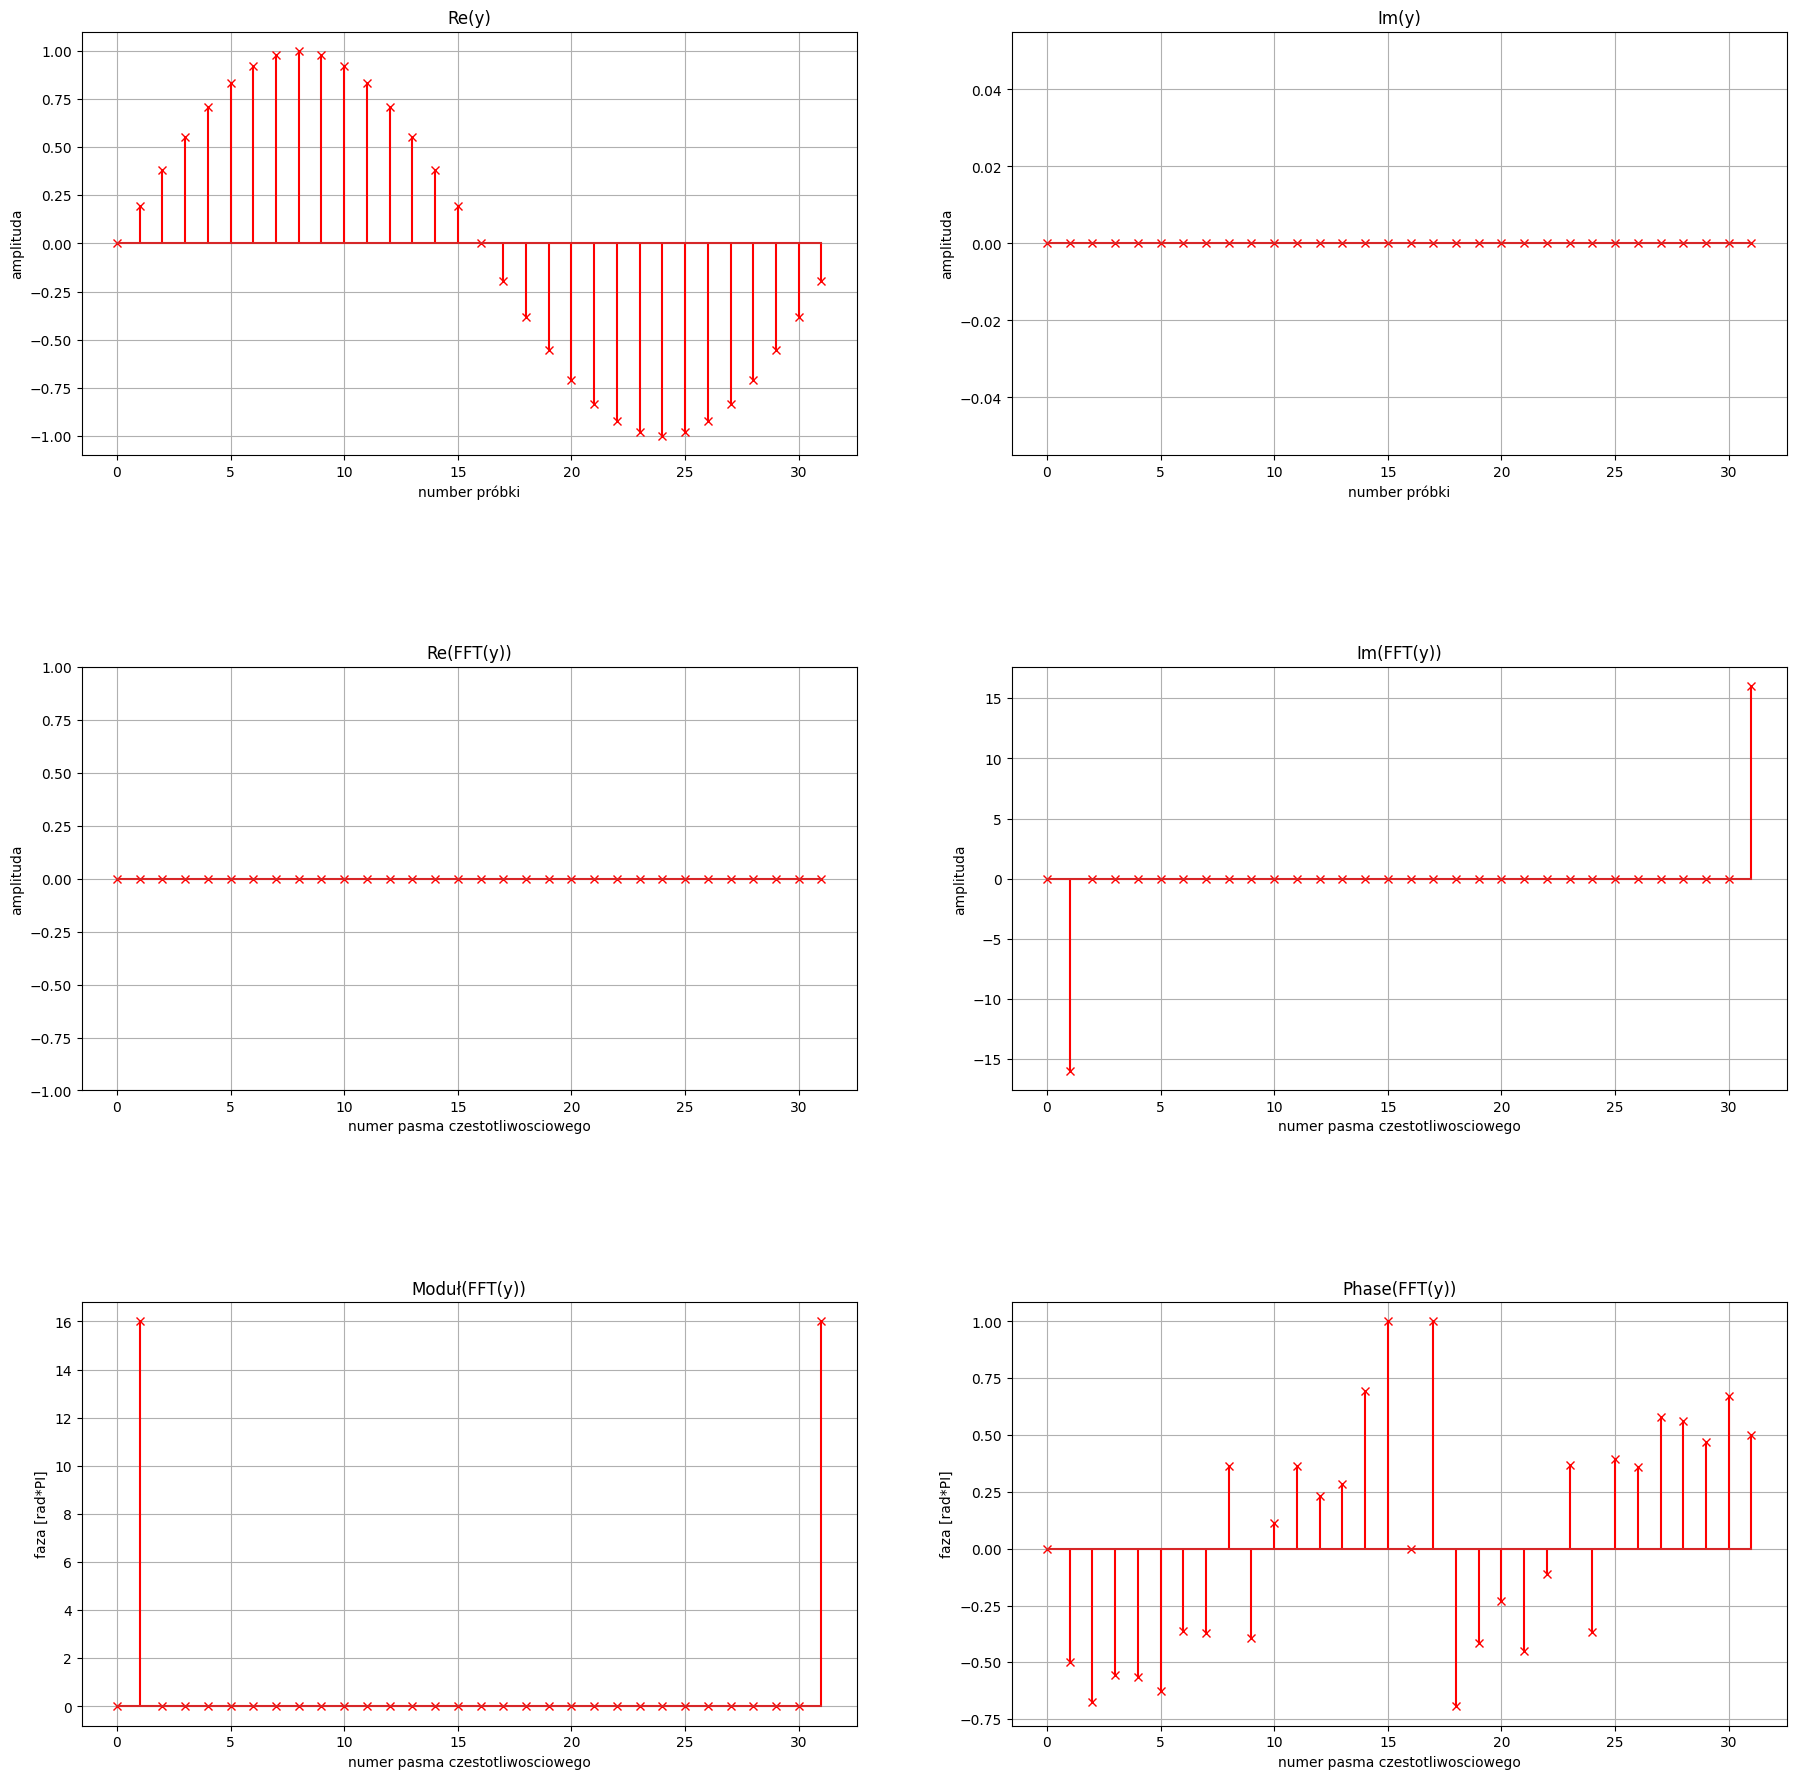

In [6]:
N = 32

x_values: np.ndarray = np.arange(0, N, 1)
y_values: np.ndarray = np.sin(2 * np.pi * x_values / N)

y_values_real: np.ndarray = np.real(y_values)
y_values_imag: np.ndarray = np.imag(y_values)

y_values_fft: np.ndarray = np.fft.fft(y_values)

y_values_fft_real: np.ndarray = np.real(y_values_fft)
y_values_fft_imag: np.ndarray = np.imag(y_values_fft)
y_values_fft_abs: np.ndarray = np.abs(y_values_fft)
y_values_fft_angle: np.ndarray = np.angle(y_values_fft) / np.pi

_, axs = pyplot.subplots(3, 2, figsize=(22, 22))

for stem in [
    Stem(x_values, y_values_real, 'Re(y)', 'number próbki', 'amplituda', axs[0][0]),
    Stem(x_values, y_values_imag, 'Im(y)', 'number próbki', 'amplituda', axs[0][1]),
    Stem(x_values, y_values_fft_real, 'Re(FFT(y))', 'numer pasma czestotliwosciowego', 'amplituda', axs[1][0],
         (-1, 1)),
    Stem(x_values, y_values_fft_imag, 'Im(FFT(y))', 'numer pasma czestotliwosciowego', 'amplituda', axs[1][1]),
    Stem(x_values, y_values_fft_abs, 'Moduł(FFT(y))', 'numer pasma czestotliwosciowego', 'faza [rad*PI]',
         axs[2][0]),
    Stem(x_values, y_values_fft_angle, 'Phase(FFT(y))', 'numer pasma czestotliwosciowego',
         'faza [rad*PI]', axs[2][1]),
]:
    stem.draw()


pyplot.subplots_adjust(hspace=1/2)
pyplot.show()

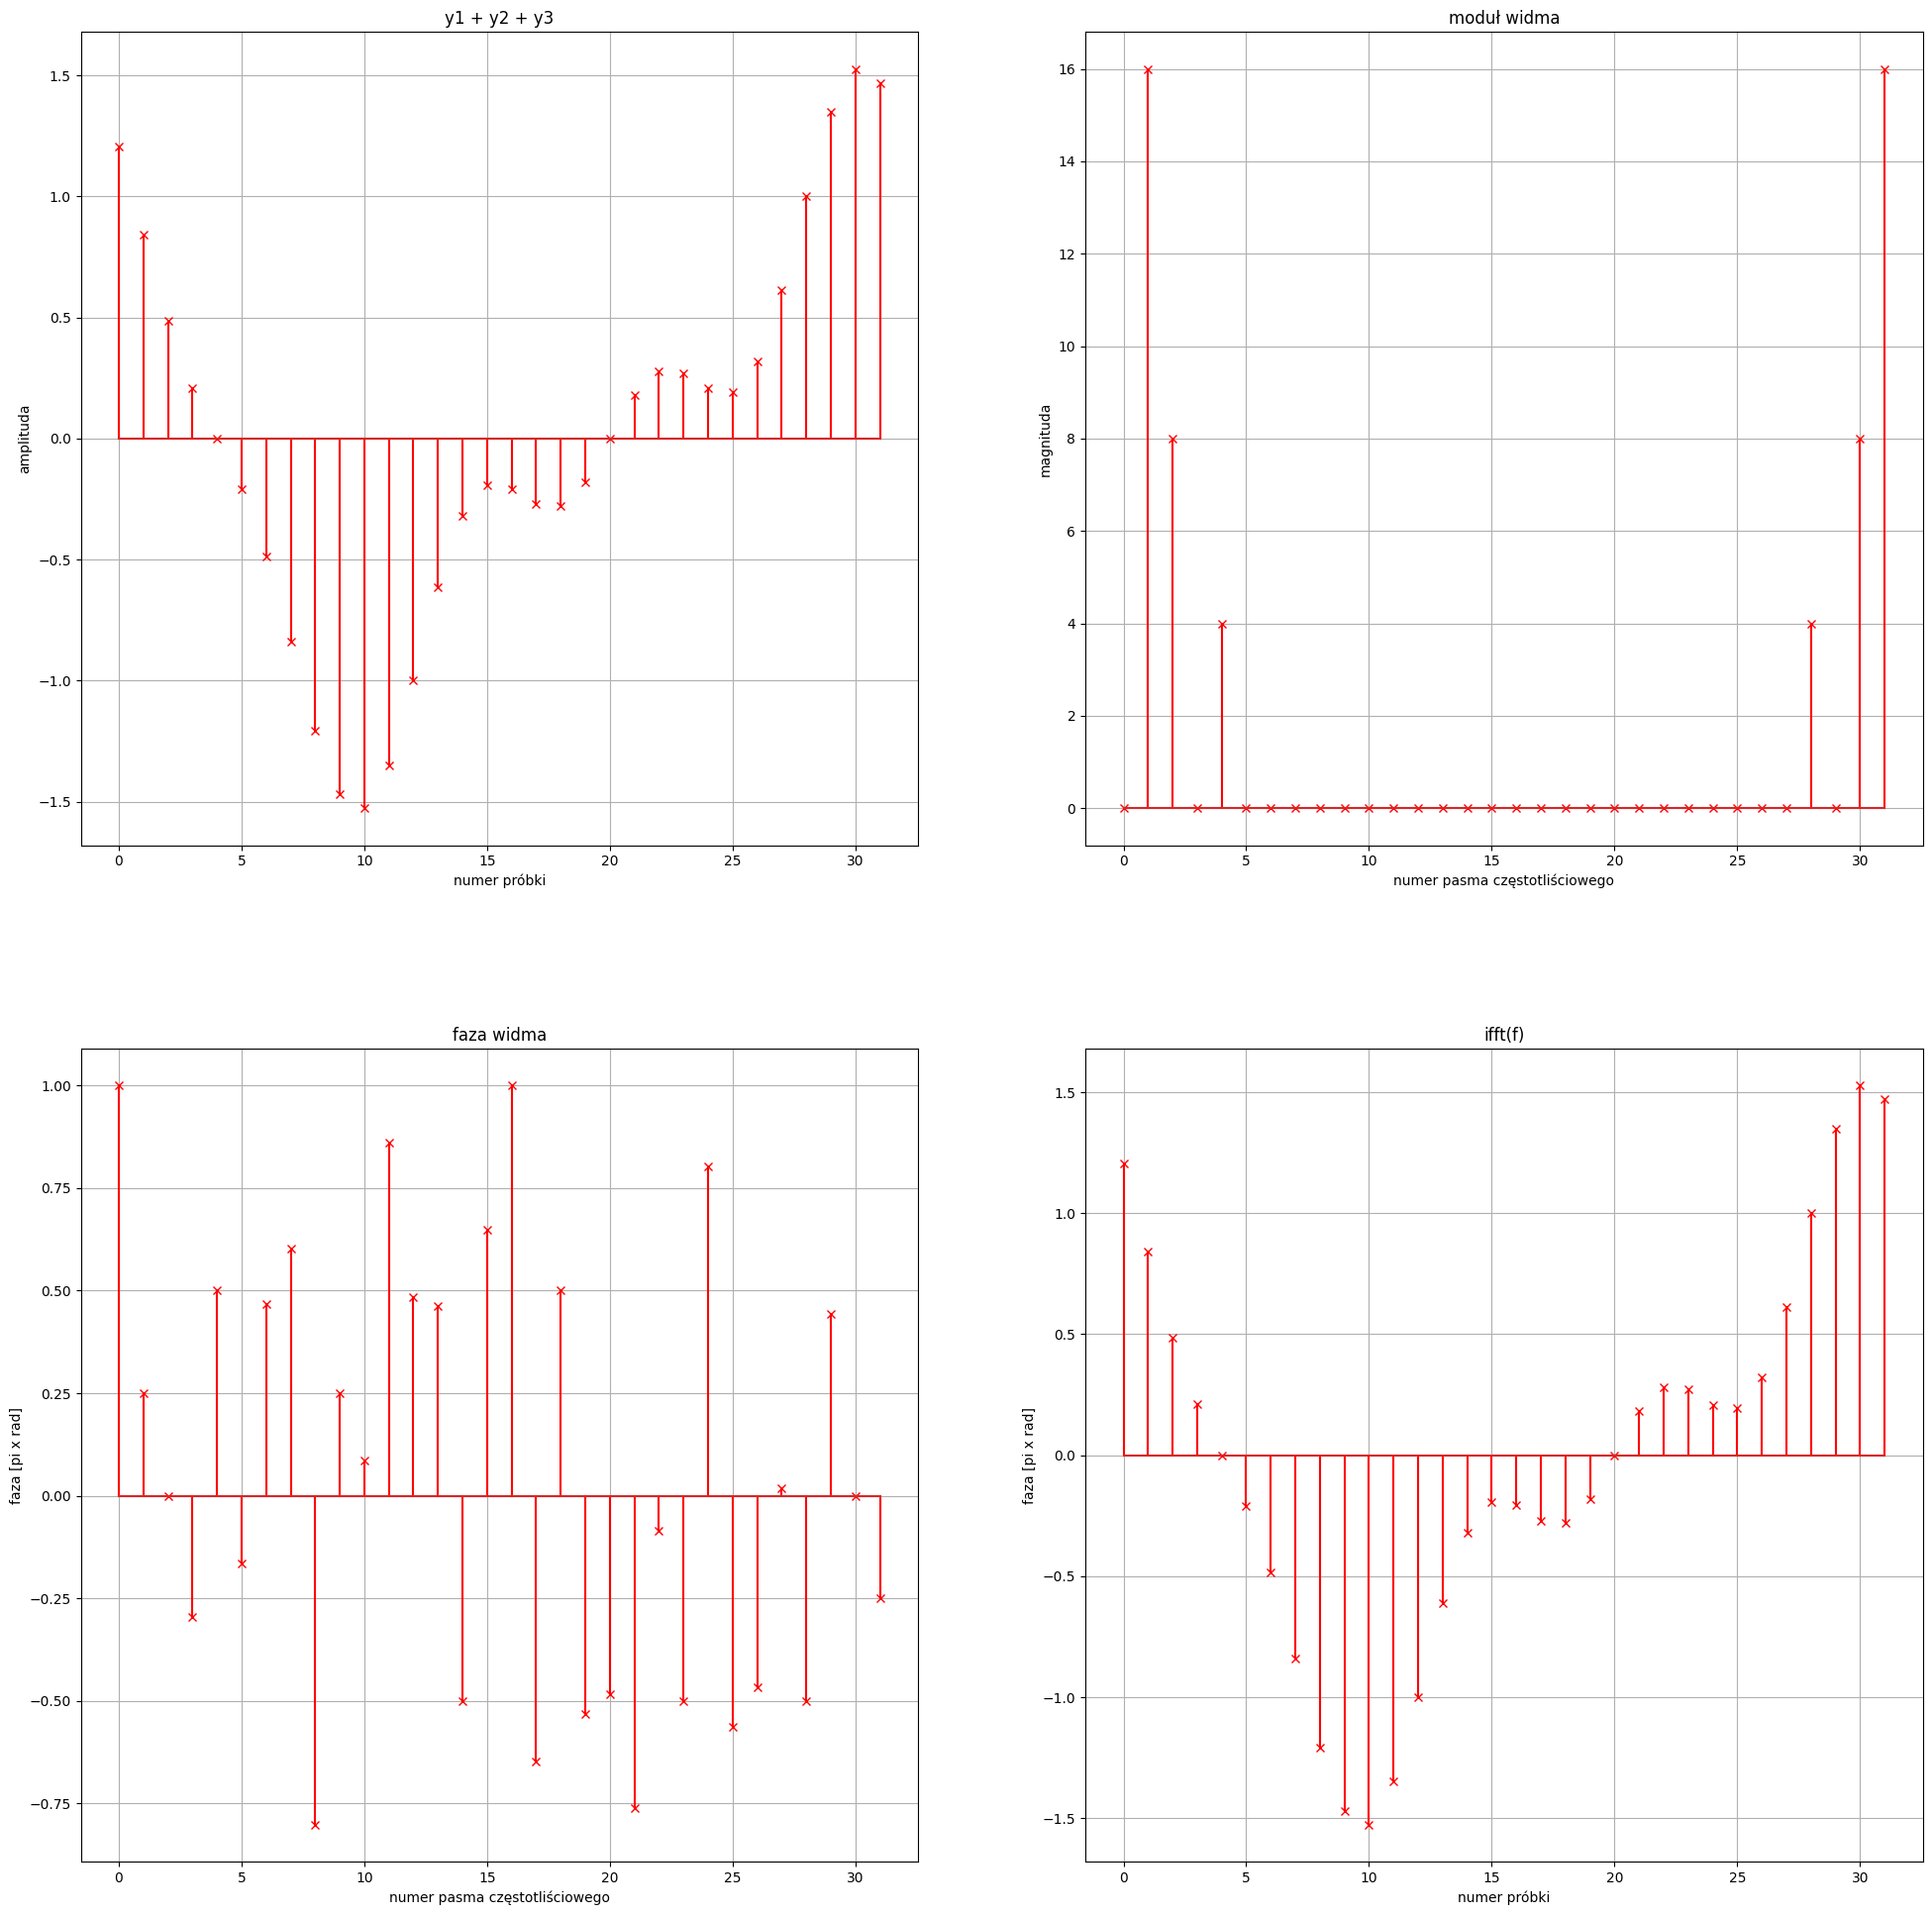

In [9]:
N = 32

x_values: np.ndarray = np.arange(0, N, 1)
y_values: np.ndarray = np.cos(2 * np.pi * x_values / N + np.pi / 4) + 1 / 2 * np.cos(
    4 * np.pi * x_values / N) + 1 / 4 * np.cos(8 * np.pi * x_values / N + np.pi / 2)

y_values_fft = np.fft.fft(y_values)
y_values_abs = np.absolute(y_values_fft)
y_values_angle = np.angle(y_values_fft) / np.pi
y_values_ifft = np.fft.ifft(y_values_fft)

_, axs = pyplot.subplots(2, 2, figsize=(24, 24))

for stem in [
    Stem(x_values, y_values, 'y1 + y2 + y3', 'numer próbki', 'amplituda', axs[0][0]),
    Stem(x_values, y_values_abs, 'moduł widma', 'numer pasma częstotliściowego', 'magnituda', axs[0][1]),
    Stem(x_values, y_values_angle, 'faza widma', 'numer pasma częstotliściowego', 'faza [pi x rad]', axs[1][0]),
    Stem(x_values, y_values_ifft, 'ifft(f)', 'numer próbki',
         'faza [pi x rad]',
         axs[1][1]),
]:
    stem.draw()

pyplot.subplots_adjust(hspace=0.25)


## Zadanie 3.4
Powtórz zadanie 3.1 dla sinusoidy zespolonej tj. y[n] = exp(j(ωn + φ)), gdzie ω – pulsacja unormowana oraz φ – przesuniecie fazowe.

UWAGA, przyjąć, że ω = 2πk/N, gdzie N – liczba próbek sygnału oraz k – dowolna liczba całkowita.

Jakie są różnice (w symetrii) w stosunku do widma sygnału rzeczywistego?

    Odpowiedź: Symetia względem środka nie istnieje zarówno w module jak i w widmie sinusoidy.


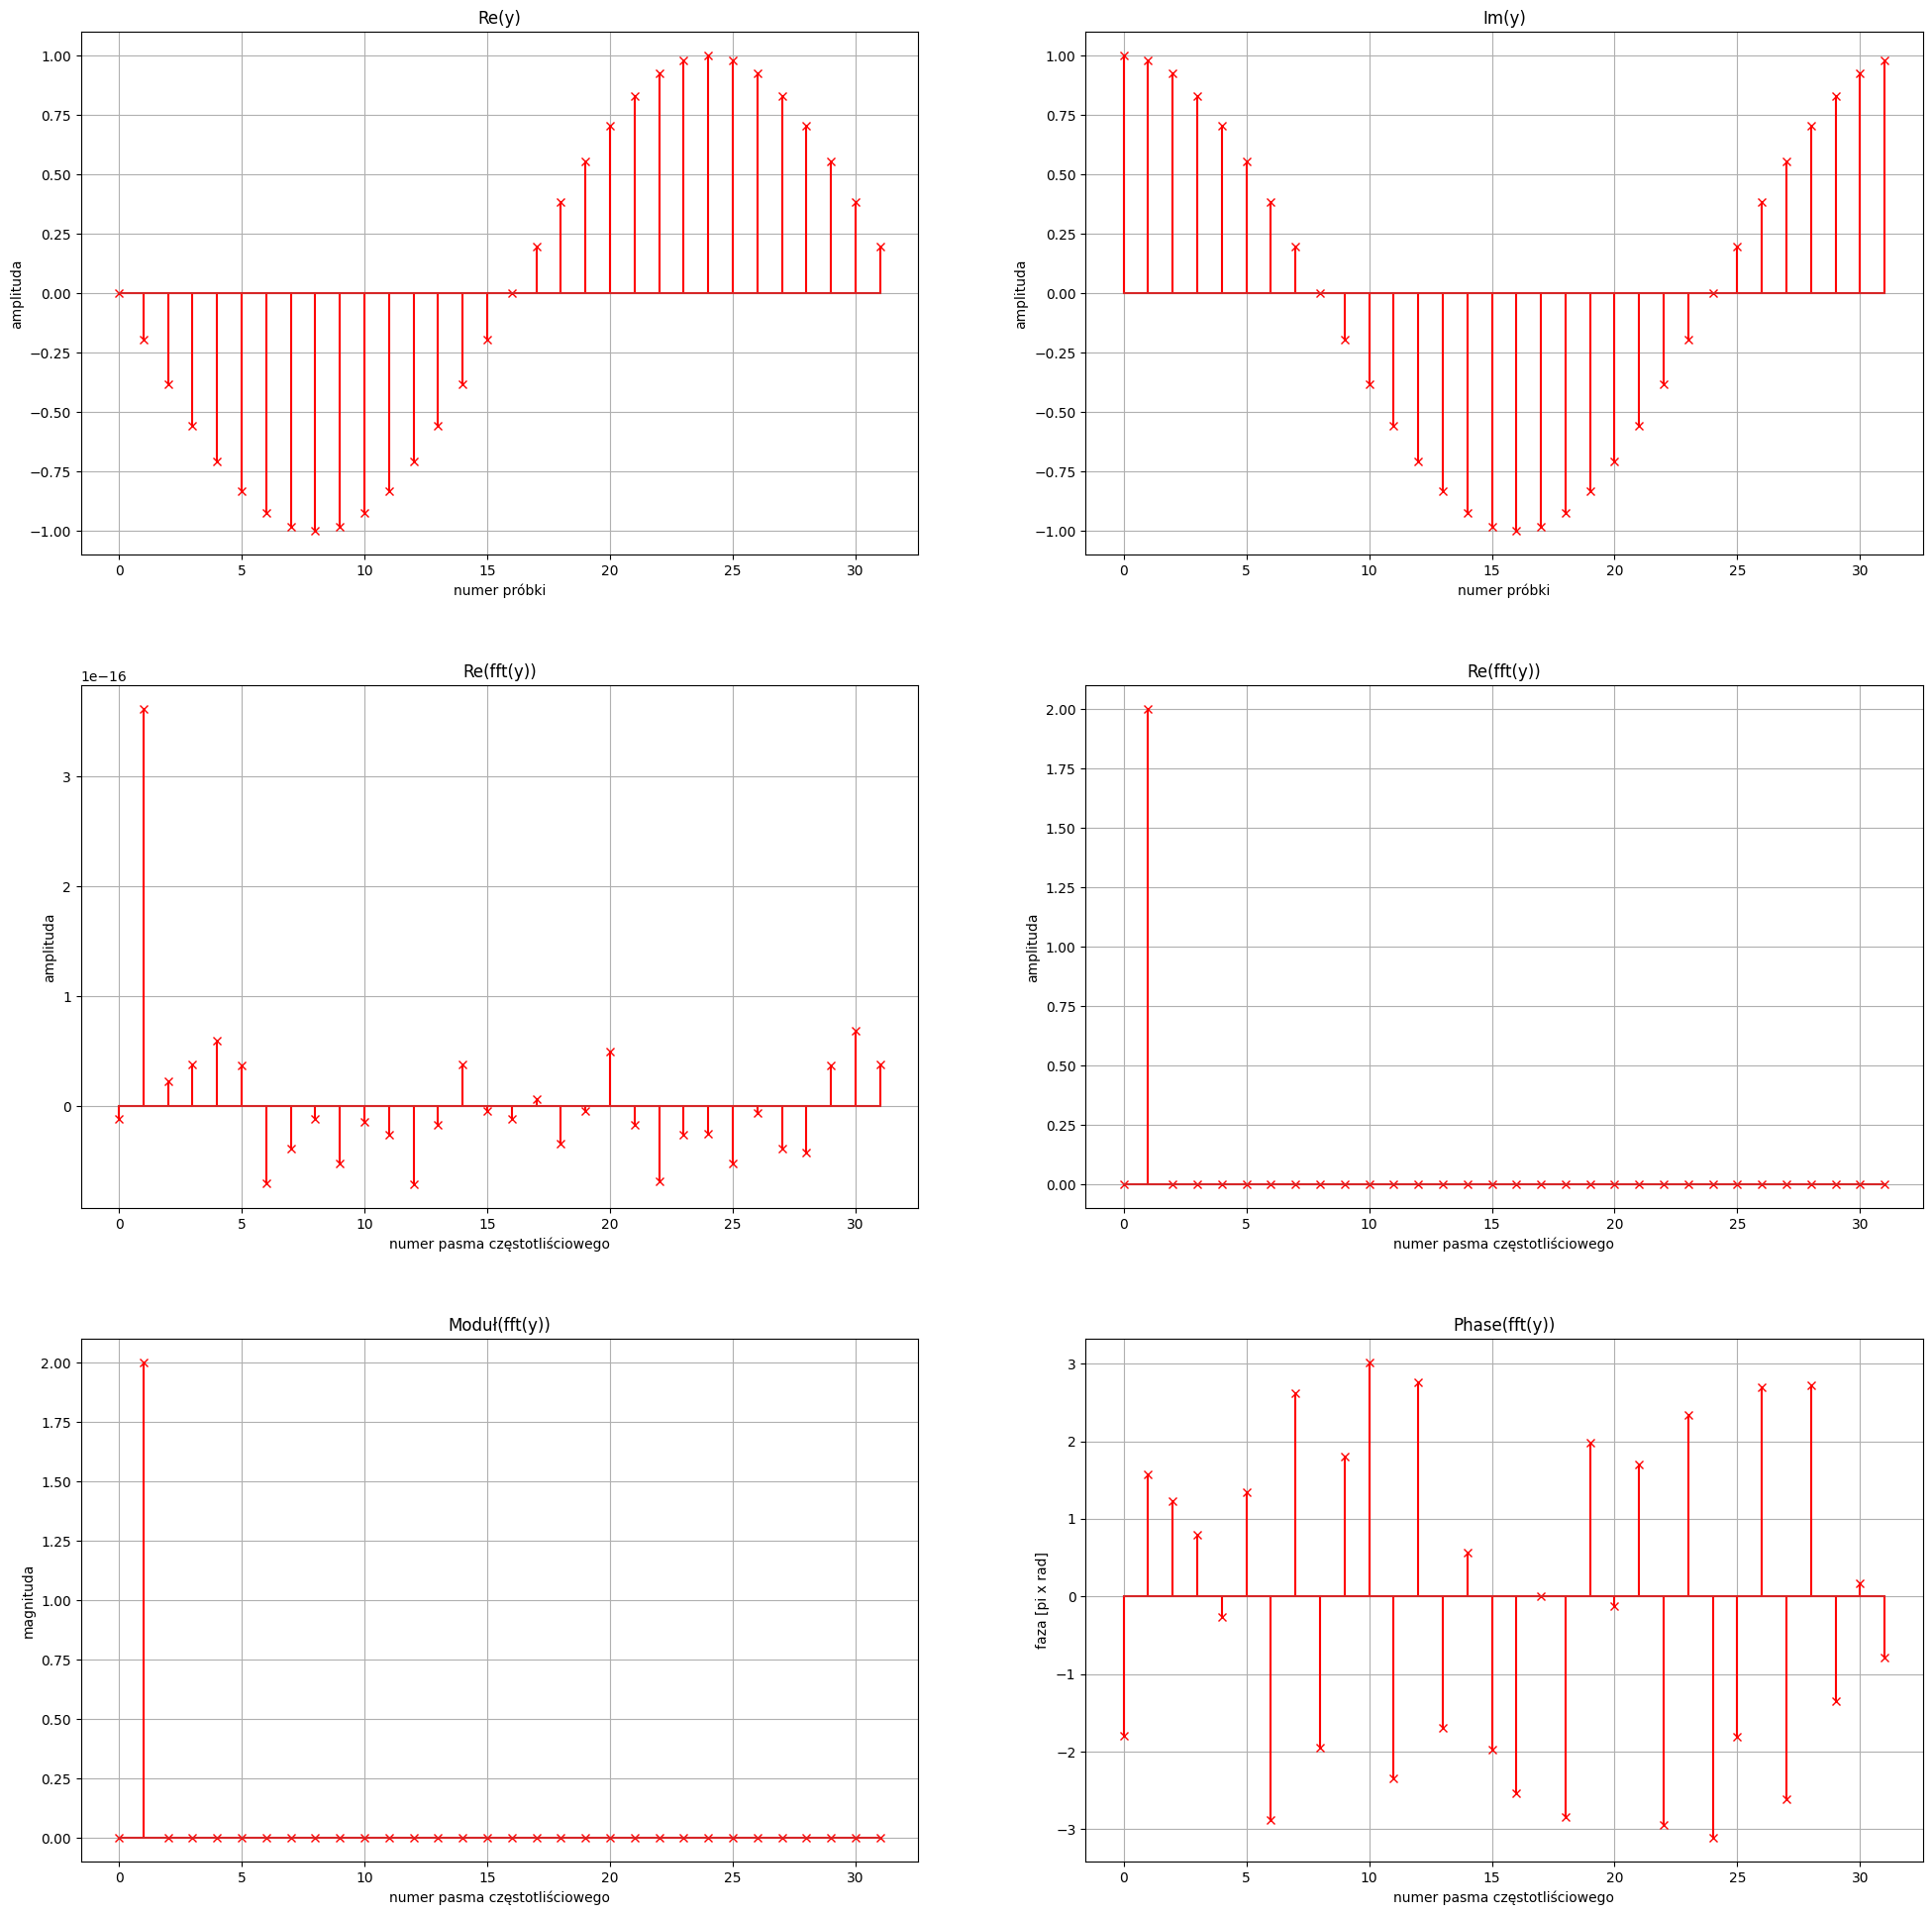

In [8]:
N = 32
PHI = np.pi / 2
K = 1

x_values: np.ndarray = np.arange(0, N, 1)

y_values: np.ndarray = np.exp(1j * (2 * np.pi * K / N * x_values + PHI))
y_values_real: np.ndarray = np.real(y_values)
y_values_imag: np.ndarray = np.imag(y_values)

y_values_fft: np.ndarray = np.fft.fft(y_values) * 2 / N
y_values_fft_real: np.ndarray = np.real(y_values_fft)
y_values_fft_imag: np.ndarray = np.imag(y_values_fft)
y_values_fft_abs: np.ndarray = np.abs(y_values_fft)
y_values_fft_angle: np.ndarray = np.angle(y_values_fft)

_, axs = pyplot.subplots(3, 2, figsize=(24, 24))

for stem in [
    Stem(x_values, y_values_real, 'Re(y)', 'numer próbki', 'amplituda', axs[0][0]),
    Stem(x_values, y_values_imag, 'Im(y)', 'numer próbki', 'amplituda', axs[0][1]),
    Stem(x_values, y_values_fft_real, 'Re(fft(y))', 'numer pasma częstotliściowego', 'amplituda', axs[1][0]),
    Stem(x_values, y_values_fft_imag, 'Re(fft(y))', 'numer pasma częstotliściowego', 'amplituda', axs[1][1]),
    Stem(x_values, y_values_fft_abs, 'Moduł(fft(y))', 'numer pasma częstotliściowego', 'magnituda', axs[2][0]),
    Stem(x_values, y_values_fft_angle, 'Phase(fft(y))', 'numer pasma częstotliściowego', 'faza [pi x rad]', axs[2][1]),
]:
    stem.draw()

pyplot.subplots_adjust(hspace=0.25)
